# <center>Анализ данных и прогноз оттока клиентов фитнесс-клуба</center>

---
### Содержание:

-  [Цели дипломной работы](#task1) 
-  [Описание данных](#task2) 
-  [Необходимые для работы библиотеки](#task3) 

### 1. [**EDA | Исследовательский анализ данных**](#task4)   

  1.1. [Подготовка данных](#task5)  
  1.2. [Оценка коррелирующих с оттоком параметров](#task6)  
  1.3. [Общий портрет клиента в разрезе оттока](#task7)  
  1.4. [Выводы и предложения](#task8)  
 
### 2. [**Прогноз оттока клиентов**](#task2-0)  

  2.1. [**Модель случайного леса | Random Forest**](#task2-1)  
  2.1.1. [Построение модели | Random Forest](#task2-1-1)   
  2.1.2. [Оценка точности работы модели | Random Forest](#task2-1-2)  
  2.1.3. [Отбор признаков для модели | Random Forest](#task2-1-3) 
    
  2.2. [**Модель логистической регрессии | Logistic Regression**](#task2-2)  
  2.2.1. [Построение модели | Logistic Regression](#task2-2-1)   
  2.2.2. [Оценка точности работы модели | Logistic Regression](#task2-2-2)   
  2.2.3. [Отбор признаков для модели | Logistic Regression](#task2-2-3)   
  
  2.3. [**Модель дерева решений | Decision Tree**](#task2-3)  
  2.3.1. [Построение модели | Decision Tree](#task2-3-1)   
  2.3.2. [Оценка точности работы модели | Decision Tree](#task2-3-2)   
  2.3.3. [Отбор признаков для модели | Decision Tree](#task2-3-3)   
  
  2.4. [**Метод опорных векторов | Support Vector Machines**](#task2-4)  
  2.4.1. [Построение модели | Support Vector Machines](#task2-4-1)   
  2.4.2. [Оценка точности работы модели | Support Vector Machines](#task2-4-2)   
  2.4.3. [Отбор признаков для модели | Support Vector Machines](#task2-4-3)   
  
  2.5. [**Метод градиентного бустинга | EXtreme Gradient Boosting**](#task2-5)  
  2.5.1. [Построение модели | EXtreme Gradient Boosting](#task2-5-1)   
  2.5.2. [Оценка точности работы модели | EXtreme Gradient Boosting](#task2-5-2)   
  2.5.3. [Отбор признаков для модели | SEXtreme Gradient Boosting](#task2-5-3)   
  
  2.6. [Выводы | выбор модели прогноза](#task2-6)  
 
### 3. [**Кластеризация клиентов**](#task3-0)  

  3.1. [Иерархическая кластеризация](#task3-1)  
  3.2. [Метод k-средних | K-Means](#task3-2)  
  3.3. [Анализ срезов кластеров](#task3-3)  
  3.4. [Выводы и предложения](#task3-4)  

---

### <a id = 'task1'> Цели дипломной работы:  
1. Построить модель прогноза оттока клиентов на основе характеризующих их данных.
2. Выявление групп клиентов с общими характеристиками. 
    
---

## <a id = 'task2'>Описание данных:

- '**Churn**' — факт оттока в текущем месяце   

### Данные клиента за предыдущий до проверки факта оттока месяц:  


- '**gender**' — пол  
- '**Near_Location**' — проживание или работа в районе, где находится фитнес-центр  
- '**Partner**' — сотрудник компании-партнёра клуба  
(сотрудничество с компаниями, чьи
сотрудники могут получать скидки на абонемент — в таком случае
фитнес-центр хранит информацию о работодателе клиента)  
- '**Promo_friends**' — факт первоначальной записи в рамках акции «приведи друга»  
(использовал промо-код от знакомого при оплате первого абонемента)  
- '**Phone**' — наличие контактного телефона  
- '**Age**' — возраст  
- '**Lifetime**' — время с момента первого обращения в фитнес-центр (в месяцах)  

### Информация на основе журнала посещений, покупок  и информация о текущем статусе абонемента клиента:  


- '**Contract_period**' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год)  
- '**Month_to_end_contract**' — срок до окончания текущего действующего абонемента (в месяцах)  
- '**Group_visits**' — факт посещения групповых занятий  
- '**Avg_class_frequency_total**' — средняя частота посещений в неделю за все время с начала действия абонемента  
- '**Avg_class_frequency_current_month**' — средняя частота посещений в неделю за предыдущий месяц  
- '**Avg_additional_charges_total**' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон  
---

### <a id = 'task1'> Импортируем необходимые для работы библиотеки:

In [1]:
# Построение и обработка таблиц с данными
import pandas as pd

# Визуализация и построение графиков 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Статистические функции
import scipy.stats as stats 

# Математические функции
import numpy as np

# Фильтр незначительных предупреждений
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Разделение датасетов на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Модель Логистической регрессии
from sklearn.linear_model import LogisticRegression
# Алгоритм классификации Random Forest
from sklearn.ensemble import RandomForestClassifier
# Модель дерева решений Decision Tree
from sklearn.tree import DecisionTreeClassifier
# Метод опорных векторов | Support Vector Machines
from sklearn.svm import SVC
# Метод градиентного бустинга | EXtreme Gradient Boosting
import xgboost as xgb
from xgboost import XGBClassifier

# Матрица ошибок результатов работы модели
from sklearn.metrics import confusion_matrix  

# Расчет точности - отношение совпадений к общему количеству позиций
from sklearn.metrics import accuracy_score
# Расчет точности на основе матрицы ошибок - Precision, Recall, f1
from sklearn.metrics import precision_score, recall_score, f1_score

# Выбор значимых параметров на основе 'случайного леса'
from sklearn.feature_selection import SelectFromModel
# Выбор лучших параметров на основе перебора всех параметров
from sklearn.model_selection import GridSearchCV

# Нормализация (масштабирование) данных
from sklearn.preprocessing import StandardScaler

# Модель кластерного анализа K-средних | K-means
from sklearn.cluster import KMeans
# Иерархическая кластеризация | Дендрограмма
import scipy.cluster.hierarchy as shc
# Группировка данных в кластеры
from sklearn.cluster import AgglomerativeClustering
# Оценка качества кластеризации
from sklearn.metrics import silhouette_score

---
# <a id = 'task4'> 1. EDA | Исследовательский анализ данных

## <a id = 'task5'> 1.1. Подготовка данных
---

In [2]:
# Загружаем данные  

df = pd.read_csv('D:\\Netology\\Модуль 5. Python\\TOTAL_Analytics_fitness\\gym_dataset.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0


In [3]:
# Проверяем наличие повторов записей

df.duplicated().value_counts()

False    4000
dtype: int64

In [4]:
# Смотрим на описание данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   int64  
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
# Выводим основную статистику

df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,5.011500,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,3.899573,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,2.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,2.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,7.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,13.000000,31.000000,6.023668,6.146783,1.000000


---
- Набор данных состоит из 4000 записей, состоящих из 14 параметров.  
- Повторов записей нет.
- Все данные имеют численное выражение (целые и дробные).  
- Значений, не соответствующих условиям диапазона для допустимых нет.  
- Исходя из известных диапазонов значений, по основной статистике можем сделать вывод об осутствии выбросов в значениях, кроме параметра 'Avg_additional_charges_total'.  
- Пропусков нет. На всякий случай проверяем:
---

In [6]:
# Считаем количество пропусков в каждом столбце

print(df.isnull().sum())

# % пропусков в каждом столбце
# (df.isnull().mean() * 100).round(2)

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


---
Стоит проверить наличие выбросов в значениях параметра 'Avg_additional_charges_total' (суммарная выручка от других услуг)  
Через межквартильный размах корректно искать выбросы в нормально распределенных данных  
Оцениваем нормальность распределения визуально:

---

In [7]:
stats.normaltest(df['Avg_additional_charges_total'])

NormaltestResult(statistic=217.1033594810358, pvalue=7.187940729972919e-48)

<AxesSubplot:xlabel='Avg_additional_charges_total', ylabel='Density'>

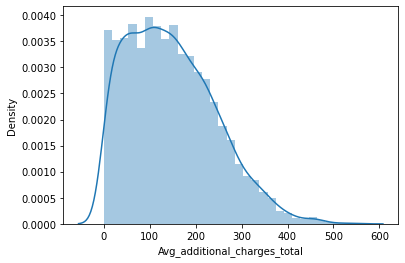

In [8]:
sns.distplot(df.Avg_additional_charges_total)

---
Видим распределение, похожее на нормальное, но 'односторонее'  
Выбросы возможны только со стороны upper_bound

---

In [9]:
# Проверяем наличие выбросов в столбце 'Avg_additional_charges_total'
# Допустинмые значения: >lower_bound и <upper_bound

q1 = df['Avg_additional_charges_total'].quantile(0.25)
q3 = df['Avg_additional_charges_total'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
upper_bound = q3 + (1.5 * iqr)

print('% выбросов по методу квантилей:',
    round(len(df[(
    (df['Avg_additional_charges_total'] < lower_bound) | 
    (df['Avg_additional_charges_total'] > upper_bound) 
)]) / len(df['Avg_additional_charges_total']) *100, 2)
)

% выбросов по методу квантилей: 0.73


<AxesSubplot:title={'center':'Выбросы по методу квантилей'}>

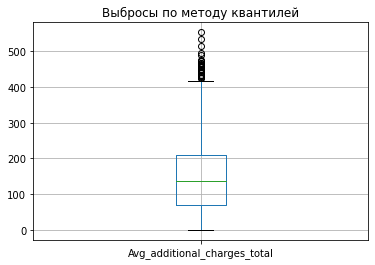

In [10]:
df['Avg_additional_charges_total'].plot(kind='box', title='Выбросы по методу квантилей', grid=True)

In [11]:
# Выводим эти выбросы:

df[(
    (df['Avg_additional_charges_total'] < lower_bound) | 
    (df['Avg_additional_charges_total'] > upper_bound) 
)]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
5,1,1,0,0,1,1,1,34,450.743960,2,3,2.623477,2.637007,0
483,0,1,0,0,1,1,0,28,455.173225,2,5,2.092353,2.154556,0
761,0,1,0,0,1,1,1,27,472.318897,2,5,3.547490,3.755130,0
822,0,1,1,1,1,1,1,29,460.904008,2,10,3.157764,3.154869,0
862,1,1,0,0,1,1,0,34,445.954527,2,1,1.872359,1.892621,0
975,0,0,1,0,1,12,1,32,552.590740,12,1,0.887859,0.939304,0
999,0,1,1,1,1,12,1,28,457.406479,9,1,1.718064,1.655872,0
1400,1,1,0,0,1,6,1,31,462.178660,5,0,2.504586,2.453484,0
1597,0,0,0,0,1,6,0,31,471.720040,7,21,3.284087,3.294925,0
1756,1,1,0,0,1,1,1,30,456.861001,2,2,1.937277,2.011021,0


---
## <a id = 'task6'> 1.2. Оценка коррелирующих с оттоком параметров
---

In [12]:
# Оцениваем масштаб оттока в текущем месяце

data = df[['Churn']].value_counts()
data = data.to_frame().reset_index()
data = data.rename(columns = {0:'count'})
data['% charn'] = round(data['count'] / data['count'].sum() * 100, 0).astype('int')

data

,Churn,count,% charn
0,0,2939,73
1,1,1061,27


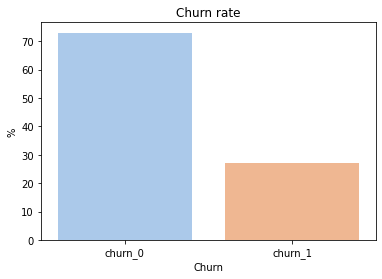

In [13]:
sns.barplot(x = ['churn_0', 'churn_1'], y='% charn', data=data, palette='pastel')
plt.title("Churn rate")
plt.xlabel('Churn')
plt.ylabel('%')

plt.show()

---
Отток клиентов сотавляет 27%  
Строим матрицу корреляций, чтобы найти наиболее влияющие на отток факторы

---

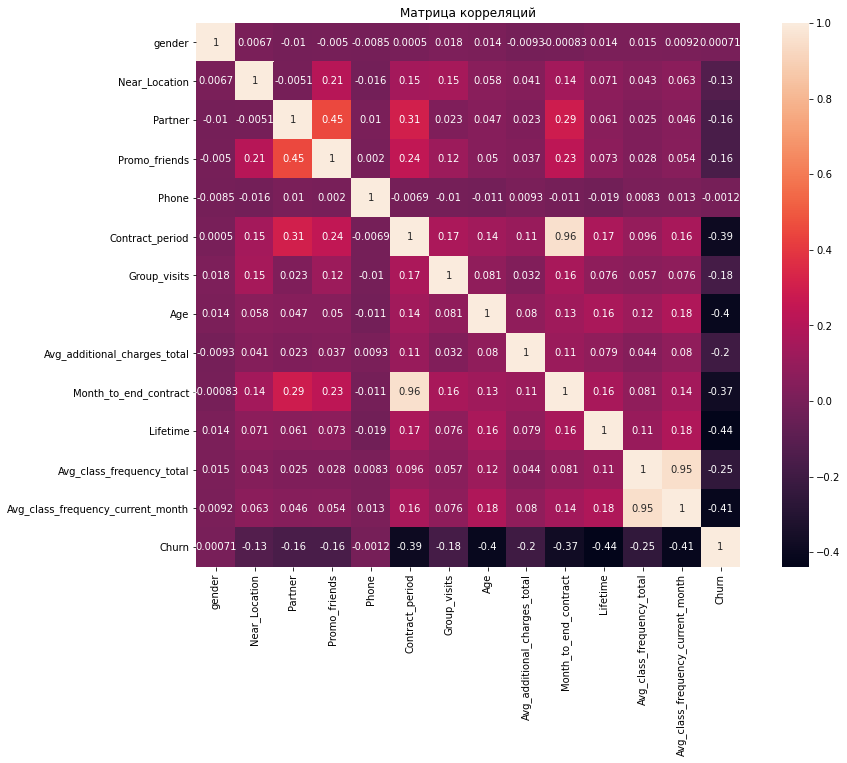

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df.corr(), annot=True, square=True)
plt.title('Матрица корреляций')
plt.show()

---
Между собой параметры имеют довольно низкую корреляцию.  
Исключения составляют производные от себя параметры.

---

In [15]:
df.corr()[['Churn']].sort_values(by = 'Churn')
df_corr = df.corr()[['Churn']].sort_values(by = 'Churn')
df_corr = df_corr.drop(df_corr[df_corr.index == 'Churn'].index)
df_corr

,Churn
Lifetime,-0.438220
Avg_class_frequency_current_month,-0.412348
Age,-0.404735
Contract_period,-0.389984
Month_to_end_contract,-0.374307
Avg_class_frequency_total,-0.249715
Avg_additional_charges_total,-0.198697
Group_visits,-0.175325
Promo_friends,-0.162233
Partner,-0.157986


---
Наиболее сильная корреляция связана со сроком посещения, частотой посещений и возрастом клиентов.  
Можно выделить следующие характеристики, присущие потерянным клиентам:

- новые клиенты
- редко посесяющие клуб
- молодые клиенты
- с коротким абонементом

Следовательно, нужно направить усилия на мотивацию клентов чаще заниматься.   
Упор сделать на более молодых с коротким абонементом.

**Предложение:**  
- Провести опрос редко занимающихся клиентов с целью выявления причин такого поведения
- По результатам опроса рассмотреть возможность устранения выявленных причин.

---

## <a id = 'task7'> 1.3. Общий портрет клиента в разрезе оттока

---

Разделим параметры по типам имеющихся данных:
- Параметры с категориальными значениями
- Параметры с непрерывными значениями

---

### 1. Параметры с категориальными значениями
На основании срезов средних значений параметров с категориальными значениями сравниваем общие портреты оставшихся и уходящих клиентов:

---

In [16]:
cat_mean_compare = round(df[df['Churn'] == 0].mean(),2)[['Group_visits', 'Promo_friends', 'Partner', 'Near_Location', 'gender', 'Phone']]
cat_mean_compare = cat_mean_compare.to_frame()
cat_mean_compare = cat_mean_compare.rename(columns = {0:'churn_0_mean'})

cat_mean_compare['churn_1_mean'] = round(df[df['Churn'] == 1].mean(),2)
cat_mean_compare['%'] = (cat_mean_compare['churn_0_mean'] / cat_mean_compare['churn_1_mean']*100-100).astype(int)
cat_mean_compare = cat_mean_compare.sort_values(by='%', ascending=False)

cat_mean_compare = cat_mean_compare.drop(cat_mean_compare[cat_mean_compare.index == 'Churn'].index)
cat_mean_compare

,churn_0_mean,churn_1_mean,%
Promo_friends,0.35,0.18,94
Group_visits,0.46,0.27,70
Partner,0.53,0.36,47
Near_Location,0.87,0.77,12
gender,0.51,0.51,0
Phone,0.90,0.90,0


---
Оценим различия визуально:

---

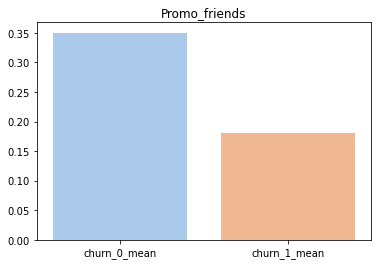

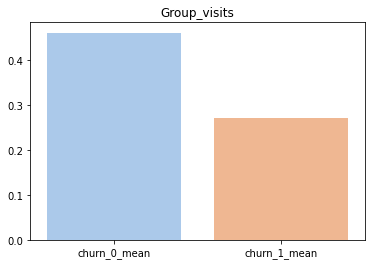

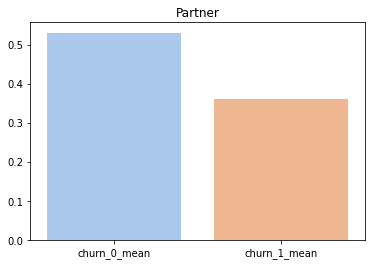

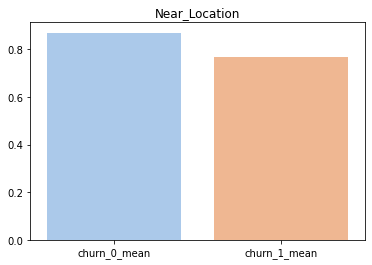

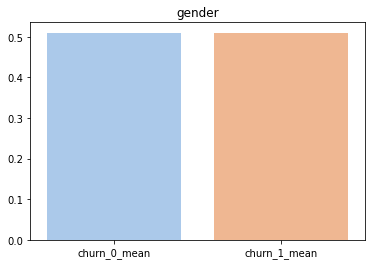

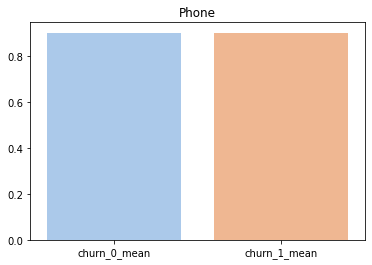

In [17]:
for a in range(len(cat_mean_compare)):
    sns.barplot(data = cat_mean_compare[['churn_0_mean', 'churn_1_mean']][a:a+1], palette='pastel')
    plt.title(cat_mean_compare[a:a+1].index[0])
    plt.show()
    print('')
    

---
### 2. Параметры с непрерывными значениями
На основании распределения значений параметров с непрерывными значениями сравниваем общие портреты оставшихся и уходящих клиентов:

---

In [18]:
cont_mean_compare = round(df[df['Churn'] == 0].mean(),2)[['Lifetime', 'Avg_class_frequency_current_month', 'Age', 'Contract_period', 'Month_to_end_contract', 'Avg_class_frequency_total', 'Avg_additional_charges_total']]
cont_mean_compare = cont_mean_compare.to_frame()
cont_mean_compare = cont_mean_compare.rename(columns = {0:'churn_0_mean'})

cont_mean_compare['churn_1_mean'] = round(df[df['Churn'] == 1].mean(),2)
cont_mean_compare['%'] = (cont_mean_compare['churn_0_mean'] / cont_mean_compare['churn_1_mean']*100-100).astype(int)
cont_mean_compare = cont_mean_compare.sort_values(by='%', ascending=False)

cont_mean_compare = cont_mean_compare.drop(cont_mean_compare[cont_mean_compare.index == 'Churn'].index)
cont_mean_compare

,churn_0_mean,churn_1_mean,%
Lifetime,4.71,0.99,375
Contract_period,5.75,1.73,232
Month_to_end_contract,5.89,2.58,128
Avg_class_frequency_current_month,2.03,1.04,95
Avg_class_frequency_total,2.02,1.47,37
Avg_additional_charges_total,158.45,115.08,37
Age,29.98,26.99,11


---
Оценим распределение значений визуально:

---

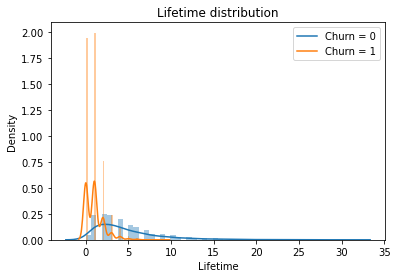

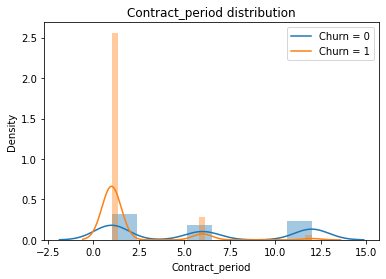

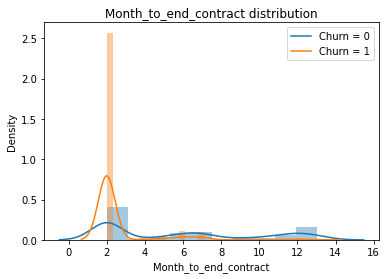

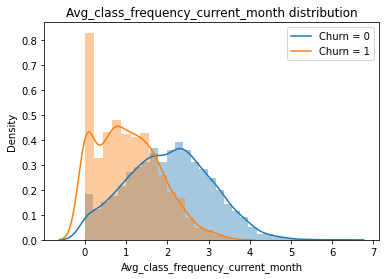

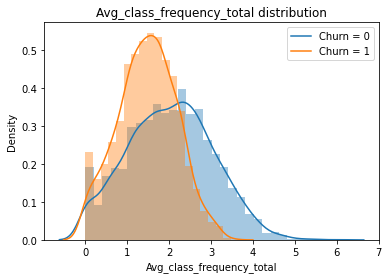

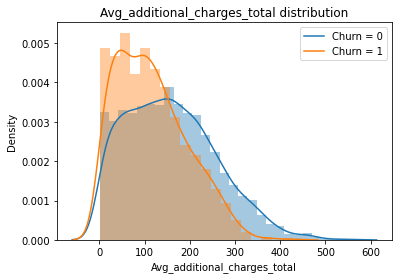

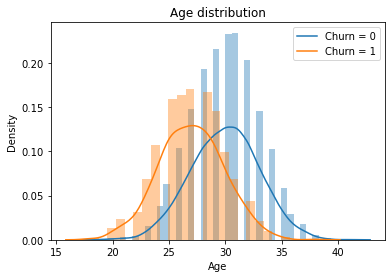

In [19]:
сontinuous_data_Churn_0 = df[df['Churn'] == 0] [['Lifetime', 'Contract_period', 'Month_to_end_contract', 'Avg_class_frequency_current_month', 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'Age']]
сontinuous_data_Churn_0

сontinuous_data_Churn_1 = df[df['Churn'] == 1] [['Lifetime', 'Contract_period', 'Month_to_end_contract', 'Avg_class_frequency_current_month', 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'Age']]
сontinuous_data_Churn_1

for a in сontinuous_data_Churn_0.columns:
    
    sns.distplot(сontinuous_data_Churn_0[a])
    sns.distplot(сontinuous_data_Churn_1[a])

    print('')
    plt.title(a+' distribution')
    plt.legend(['Churn = 0', 'Churn = 1'])
    plt.show()
    
    print('')

---
## <a id = 'task8'> 1.4. Выводы и предложения
    
Разделим параметры на группы по степени влияния на отток:
    
---

In [20]:
# Общий список параметров по степени влияния:

total_mean_compare = round(df[df['Churn'] == 0].mean(),2)
total_mean_compare = total_mean_compare.to_frame()
total_mean_compare = total_mean_compare.rename(columns = {0:'churn_0_mean'})

total_mean_compare['churn_1_mean'] = round(df[df['Churn'] == 1].mean(),2)
total_mean_compare['%'] = (total_mean_compare['churn_0_mean'] / total_mean_compare['churn_1_mean']*100-100).astype(int)
total_mean_compare = total_mean_compare.sort_values(by='%', ascending=False)

total_mean_compare = total_mean_compare.drop(total_mean_compare[total_mean_compare.index == 'Churn'].index)
total_mean_compare

,churn_0_mean,churn_1_mean,%
Lifetime,4.71,0.99,375
Contract_period,5.75,1.73,232
Month_to_end_contract,5.89,2.58,128
Avg_class_frequency_current_month,2.03,1.04,95
Promo_friends,0.35,0.18,94
Group_visits,0.46,0.27,70
Partner,0.53,0.36,47
Avg_additional_charges_total,158.45,115.08,37
Avg_class_frequency_total,2.02,1.47,37
Near_Location,0.87,0.77,12


---

**1.** Выделяем параметры с наиболее сильным влиянием на отток:
- Avg_class_frequency_current_month
- Promo_friends
- Group_visits	
- Partner	
- Avg_additional_charges_total	

**2.** Параметры с низким влиянием на отток:
- Near_Location
- Age	

**3.** Параметры, практически не влияющие на отток:
- gender
- Phone

**4.** Параметры, которые можно считать скорее следствием лояльности клиентов:
- Lifetime
- Contract_period
- Month_to_end_contract


---
### Не влияющие на отток параметры:

Оценим влияние **пола** клиента и **наличия телефона** в базе клуба статистически:  
(gender, Phone)

---

In [21]:
t, p_value = stats.ttest_ind(df[df['Churn'] == 0]['gender'], df[df['Churn'] == 1]['gender'])  # Критерий Стьюдента (t-test)
t, p_value

(-0.04474984696315838, 0.9643089361902392)

In [22]:
t, p_value = stats.ttest_ind(df[df['Churn'] == 0]['Phone'], df[df['Churn'] == 1]['Phone'])  # Критерий Стьюдента (t-test)
t, p_value

(0.07439624953956464, 0.9406988149138941)

---
Видим крайне низкое влияние на уровне значимости 94%.  
Подтверждаем гипотезу о незначительности данных факторов.

---


### Параметры с низким влиянием на отток:  

1. Влияние **удаленности** клиента от клуба логически обосновано.   
(Near_Location) 

Предложение:  
Ввести коэффициент на скидку, привязанный к удаленности клиента от клуба.  

2. Влияние **возраста**, возможно, связано со стремлением более молодых к новому.  
 (Age)

Возможно, динамика покажет стабильный приток клиентов этого возраста, компенсирующий отток.  

Предложение:  
Держать руку на пульсе тенденций и перенимать опыт конкурентов.  

---
### Параметры с наиболее сильным влиянием на отток:


1. **Активность клиентов клуба:**  
    (Avg_class_frequency_current_month)

Редко занимающиеся клиенты чаще прекращают занятия совсем.

Предложение:  
Провести опрос редко занимающихся клиентов с целью выявления причин такого поведения  
По результатам опроса рассмотреть возможность устранения выявленных причин.  
    

2. **Дополнительные услуги:**  
   (Group_visits, Avg_additional_charges_total)  

Видим, что уходящие клиенты гораздо реже посещали групповые занятия и меньше тратили на доп услуги  
Возможно, ушедшие клиенты не успели оценить все услуги клуба до принятия решения о продлении абонемента.

Предложение:  
Предоставить скидку на доп услуги тем, кто ими не пользуется (или давно не пользовался)  
Предложить записаться на пробные групповые занятия.

3. **Маркетинг и привлечение клиентов:**  
   (Partner, Promo_friends)  

Убеждаемся, что программа направлена на целевую аудиторию, так как привлекаемые таким образом клиенты реже уходят.  
Вывод: Программы работают и дают результат.

Предложение:  
Рассмотреть возможность масштабировать программу путем стимулирования клиентов и партнеров.

---

# <a id = 'task2-0'> 2. Прогноз оттока клиентов
---
    
Для сравнения рассмотрим несколько моделей классификации:
    
- Модель случайного леса | Random Forest
- Модель логистической регрессии | Logistic Regression
- Модель дерева решений | Decision Tree
- Метод опорных векторов | Support Vector Machines
- Метод градиентного бустинга | EXtreme Gradient Boosting

---
## <a id = 'task2-1'> 2.1. Модель случайного леса | Random Forest
---
    
RF создает деревья решений для случайно выбранных семплов данных, получает прогноз от каждого дерева и выбирает наилучшее решение посредством голосования.  
    Он также предоставляет довольно эффективный критерий важности показателей (признаков).

---
### <a id = 'task2-1-1'> 2.1.1. Построение модели | Random Forest  
    
---

In [23]:
df.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

In [24]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Создаем модель

rf_model = RandomForestClassifier()

# Обучаем модель на тестовых данных

rf_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_rf = rf_model.predict(X_test)

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_rf'] = Y_pred_rf
result['Y_test'] = Y_test
result[['Y_pred_rf', 'Y_test']].head()

,Y_pred_rf,Y_test
2447,1,1
1560,0,0
2048,0,0
1675,0,1
3643,0,0


---
### <a id = 'task2-1-2'> 2.1.2. Оценка точности работы модели | Random Forest   
---

In [25]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score: {int(accuracy_score(result['Y_pred_rf'], result['Y_test'])*100)}%")

accuracy_score: 92%


Матрица ошибок:


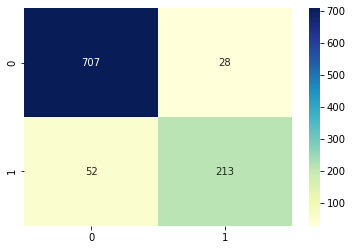

Верно предсказано Churn_0:  707
Верно предсказано Churn_1:  213

Ошибок предсказаний Churn_0:  52
Ошибок предсказаний Churn_1:  28


In [26]:
# Строим матрицу ошибок результатов работы модели

print('Матрица ошибок:')

sns.heatmap(confusion_matrix(Y_test, Y_pred_rf), annot=True, fmt="d", cmap="YlGnBu")
plt.show()

print('Верно предсказано Churn_0: ', confusion_matrix(Y_test, Y_pred_rf)[0][0])
print('Верно предсказано Churn_1: ', confusion_matrix(Y_test, Y_pred_rf)[1][1])
print('')
print('Ошибок предсказаний Churn_0: ', confusion_matrix(Y_test, Y_pred_rf)[1][0])
print('Ошибок предсказаний Churn_1: ', confusion_matrix(Y_test, Y_pred_rf)[0][1])

---
- Recall/Sensitivity Metric  

Сколько объектов наша модель смогла правильно классифицировать с позитивной меткой из всего множества позитивных.

- Precision Metric  

Сколько из всех объектов, которые классифицируются как положительные, действительно являются положительными, относительно общего количества полученных от модели позитивных меток.

- **F1 score**

Сочетание precision и recall, дает некоторый компромисс между ними двумя  
Оценка F1 достигает своего наилучшего значения в 1 и худшее в 0.

---

In [27]:
print(f'recall:\t\t {recall_score(Y_test, Y_pred_rf)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_rf)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_rf)}')

recall:		 0.8037735849056604
precision:	 0.8838174273858921
f1_score:	 0.841897233201581


---
### <a id = 'task2-1-3'> 2.1.3. Отбор признаков для модели | Random Forest   
---
- #### Random Forest  

    Воспользуемся методом случайного леса (Random Forest), чтобы определить, насколько важен признак, 
    рассчитав степень уменьшения «шумов» за счёт этого признака.

---

In [28]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Создаем и обучаем модель

rf_model = RandomForestClassifier()
rf_model.fit(X, Y)

# Выведем степень значения признаков

param_value = X.columns.to_frame().reset_index()
param_value[0] = list(rf_model.feature_importances_)
param_value = param_value.rename(columns = {0:'importance', 'index':'parameter'})
param_value= param_value.sort_values(by='importance', ascending = False)
param_value

,parameter,importance
10,Lifetime,0.274333
12,Avg_class_frequency_current_month,0.177727
11,Avg_class_frequency_total,0.134222
7,Age,0.121984
8,Avg_additional_charges_total,0.086551
5,Contract_period,0.073106
9,Month_to_end_contract,0.066058
6,Group_visits,0.016565
2,Partner,0.011987
0,gender,0.011829


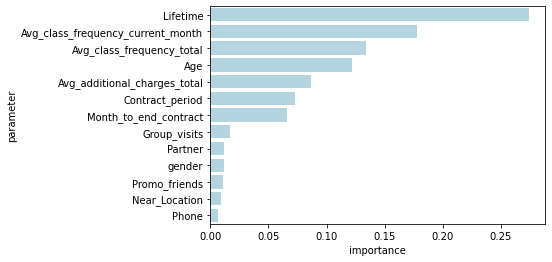

In [29]:
# Оценим степень значения визуально

sns.barplot(x="importance", y='parameter', data=param_value, color='lightblue')
plt.xticks(rotation=0)
plt.show()

In [30]:
# Посчитаем минимальное количество наиболее значимых признаков для получения максимального результата

sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000))
sel.fit(X_train, Y_train)

selected_feat= X_train.columns[(sel.get_support())]
print(f'Количество критически важных признаков: {len(selected_feat)}')
print('')
# Какие это признаки
for a in selected_feat:
    print(f'- {a}')

Количество критически важных признаков: 5

- Age
- Avg_additional_charges_total
- Lifetime
- Avg_class_frequency_total
- Avg_class_frequency_current_month


---
Проверим, насколько изменится точность прогноза при использовании в модели только значимых признаков

---

In [31]:
# Разделяем выборку на независимые и зависимую переменные:

X_main = df[['Age', 'Avg_additional_charges_total', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]

Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X_main, Y, test_size=0.25, random_state=42, stratify=Y)

# Создаем и обучаем модель

rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_rf = rf_model.predict(X_test)

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred'] = Y_pred_rf
result['Y_test'] = Y_test
result[['Y_pred', 'Y_test']].head()

,Y_pred,Y_test
2447,1,1
1560,0,0
2048,0,0
1675,1,1
3643,0,0


In [32]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_rf)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_rf)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_rf)}')

accuracy_score:	 92%
recall:		 0.8150943396226416
precision:	 0.9
f1_score:	 0.8554455445544554


---
- #### GridSearchCV  

    Может гарантировать нахождение наиболее точных параметров в указанном диапазоне параметров.  
    Однако, требует обхода всех возможных комбинаций параметров, что требует очень много времени в условиях больших наборов данных и множества параметров.

---

In [33]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

#------------------------------------------------------------

# Будем использовать следующие параметры для GridSearchCV:

# n_estimators – число деревьев в лесу.
# max_depth – глубина дерева.
# min_samples_leaf – минимальное число образцов в листах.
# min_samples_split – минимальное число образцов для сплита.

parameters = {'n_estimators': range (1, 1001, 100),
              'max_depth': [None, 1, 2, 4, 8, 10],
              'min_samples_leaf': [1, 2, 4, 8, 10],
              'min_samples_split': [2, 4, 8, 10],
              'n_jobs': [-1]}

# Создаем модель

rf_model = GridSearchCV(RandomForestClassifier(), parameters, cv=3, scoring='f1')

#------------------------------------------------------------

# Обучаем модель

rf_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_rf = rf_model.predict(X_test)

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_rf'] = Y_pred_rf
result['Y_test'] = Y_test
result[['Y_pred_rf', 'Y_test']].head()


,Y_pred_rf,Y_test
2447,1,1
1560,0,0
2048,0,0
1675,0,1
3643,0,0


In [34]:
# Полученные параметры являются лучшими для нашей модели

rf_model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 201,
 'n_jobs': -1}

In [35]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred_rf'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_rf)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_rf)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_rf)}')

Random_Forest = f1_score(Y_test, Y_pred_rf)

accuracy_score:	 91%
recall:		 0.8
precision:	 0.8724279835390947
f1_score:	 0.8346456692913385


---
Совместим и применим последовательно:
- **Random Forest**
- **GridSearchCV**

---

In [36]:
# Разделяем выборку на независимые и зависимую переменные:

X_main = df[['Age', 'Avg_additional_charges_total', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]

Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X_main, Y, test_size=0.25, random_state=42, stratify=Y)

#------------------------------------------------------------

# Будем использовать следующие параметры для GridSearchCV:

# n_estimators – число деревьев в лесу.
# max_depth – глубина дерева.
# min_samples_leaf – минимальное число образцов в листах.
# min_samples_split – минимальное число образцов для сплита.

parameters = {'n_estimators': range (1, 1001, 100),
              'max_depth': [None, 1, 2, 4, 8, 10],
              'min_samples_leaf': [1, 2, 4, 8, 10],
              'min_samples_split': [2, 4, 8, 10],
              'n_jobs': [-1]}

# Создаем модель

rf_model = GridSearchCV(RandomForestClassifier(), parameters, cv=3, scoring='f1')

#------------------------------------------------------------

# Обучаем модель

rf_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_rf = rf_model.predict(X_test)

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_rf'] = Y_pred_rf
result['Y_test'] = Y_test
result[['Y_pred_rf', 'Y_test']].head()


,Y_pred_rf,Y_test
2447,1,1
1560,0,0
2048,0,0
1675,1,1
3643,0,0


In [37]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred_rf'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_rf)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_rf)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_rf)}')

Random_Forest_top_value = f1_score(Y_test, Y_pred_rf)

accuracy_score:	 92%
recall:		 0.8150943396226416
precision:	 0.9
f1_score:	 0.8554455445544554


---
### Вывод:  

Отбор параметров с помощью модели случайнго леса (Random Forest) и GridSearchCV показал большую эффективность по сравнению с прямой передачей всех параметров в модель.

---
## <a id = 'task2-2'> 2.2. Модель логистической регрессии | Logistic Regression

---
    
Логистическая регрессия — это алгоритм классификации машинного обучения, используемый для прогнозирования вероятности категориальной зависимой переменной.
    
---

### <a id = 'task2-2-1'> 2.2.1. Построение модели логистической регрессии | Logistic Regression   
---

In [38]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Создаем модель логистической регрессии

lr_model = LogisticRegression(solver='liblinear')

# Загружаем в модель данные для тренировки

lr_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_lr = lr_model.predict(X_test)    

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_lr'] = Y_pred_lr
result['Y_test'] = Y_test
result[['Y_pred_lr', 'Y_test']].head()

,Y_pred_lr,Y_test
2447,1,1
1560,0,0
2048,0,0
1675,1,1
3643,0,0


---
### <a id = 'task2-2-2'> 2.2.2. Оценка точности работы модели | Logistic Regression  
    
---

In [39]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred_lr'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_lr)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_lr)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_lr)}')

accuracy_score:	 92%
recall:		 0.8150943396226416
precision:	 0.8744939271255061
f1_score:	 0.84375


---
### <a id = 'task2-2-3'> 2.2.3. Отбор признаков для модели | Logistic Regression

---
- #### GridSearchCV  

---

In [40]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

#------------------------------------------------------------

# Будем использовать следующие параметры для GridSearchCV:

parameters = {'penalty': ['l1', 'l2'], 
              'C': np.logspace(0,3,10)}

# Создаем модель

lr_model = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=3, scoring='f1')

#------------------------------------------------------------

# Обучаем модель

lr_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_lr = lr_model.predict(X_test)

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_lr'] = Y_pred_lr
result['Y_test'] = Y_test
result[['Y_pred_lr', 'Y_test']].head()


,Y_pred_lr,Y_test
2447,1,1
1560,0,0
2048,0,0
1675,1,1
3643,0,0


In [41]:
# Полученные параметры являются лучшими для нашей модели

lr_model.best_params_

{'C': 10.0, 'penalty': 'l1'}

In [42]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred_lr'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_lr)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_lr)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_lr)}')

Logistic_Regression = f1_score(Y_test, Y_pred_lr)

accuracy_score:	 92%
recall:		 0.8264150943396227
precision:	 0.8690476190476191
f1_score:	 0.8471953578336557


---
Результат:
- accuracy_score не изменился
- f1_score прогноза повысился на 0,3%
- нагрузка на модель снизилась за счет уменьшения количества обрабатываемой информации.

---
## <a id = 'task2-3'> 2.3. Модель дерева решений | Decision Tree

---
    
Дерево решений — это инструмент поддержки принятия решений, который использует древовидную модель решений и их возможных последствий.
    
---

### <a id = 'task2-3-1'> 2.3.1. Построение модели | Decision Tree
---

In [43]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Создаем модель логистической регрессии

dt_model = DecisionTreeClassifier()

# Загружаем в модель данные для тренировки

dt_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_dt = dt_model.predict(X_test)    

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_dt'] = Y_pred_dt
result['Y_test'] = Y_test
result[['Y_pred_dt', 'Y_test']].head()

,Y_pred_dt,Y_test
2447,0,1
1560,0,0
2048,0,0
1675,0,1
3643,0,0


---
### <a id = 'task2-3-2'> 2.3.2. Оценка точности | Decision Tree
    
---

In [44]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred_dt'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_dt)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_dt)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_dt)}')

accuracy_score:	 89%
recall:		 0.7660377358490567
precision:	 0.8087649402390438
f1_score:	 0.7868217054263567


---
### <a id = 'task2-3-3'> 2.3.3. Отбор признаков | Decision Tree

---
- #### GridSearchCV  

---

In [45]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

#------------------------------------------------------------

# Будем использовать следующие параметры для GridSearchCV:

parameters = {'max_depth': [None, 1, 2, 4, 5, 8, 10],
              'min_samples_leaf': [1, 2, 4, 5, 8, 10],
              'min_samples_split': [2, 4, 6, 5, 10] }

# Создаем модель

dt_model = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, scoring='f1')

#------------------------------------------------------------

# Обучаем модель

dt_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_dt = dt_model.predict(X_test)

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_dt'] = Y_pred_dt
result['Y_test'] = Y_test
result[['Y_pred_dt', 'Y_test']].head()


,Y_pred_dt,Y_test
2447,1,1
1560,0,0
2048,0,0
1675,0,1
3643,0,0


In [46]:
# Полученные параметры являются лучшими для нашей модели

dt_model.best_params_

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [47]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred_dt'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_dt)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_dt)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_dt)}')

Decision_Tree = f1_score(Y_test, Y_pred_dt)

accuracy_score:	 89%
recall:		 0.7735849056603774
precision:	 0.8299595141700404
f1_score:	 0.80078125


---
Результат:
- accuracy_score не изменился
- f1_score прогноза повысился на 1%
- нагрузка на модель снизилась за счет уменьшения количества обрабатываемой информации.

---
## <a id = 'task2-4'> 2.4. Метод опорных векторов | Support Vector Machines

---
    
Работа метода опорных векторов заключается в рисовании линии между разными кластерами точек, которые нужно сгруппировать в классы. С одной стороны линии будут точки, принадлежащие одному классу, с другой стороны — к другому классу.

Классификатор будет пытаться увеличить расстояние между рисуемыми линиями и точками на разных сторонах, чтобы увеличить свою «уверенность» определения класса. Когда все точки построены, сторона, на которую они падают — это класс, которому эти точки принадлежат.
    
---

### <a id = 'task2-4-1'> 2.4.1. Построение модели | Support Vector Machines
---

In [48]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Создаем модель логистической регрессии

svm_model = SVC()

# Загружаем в модель данные для тренировки

svm_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_svm = svm_model.predict(X_test)    

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_svm'] = Y_pred_svm
result['Y_test'] = Y_test
result[['Y_pred_svm', 'Y_test']].head()

,Y_pred_svm,Y_test
2447,0,1
1560,0,0
2048,0,0
1675,0,1
3643,0,0


---
### <a id = 'task2-4-2'> 2.4.2. Оценка точности | Support Vector Machines
    
---

In [49]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred_svm'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_svm)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_svm)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_svm)}')

accuracy_score:	 78%
recall:		 0.18490566037735848
precision:	 0.9607843137254902
f1_score:	 0.31012658227848094


---
### <a id = 'task2-4-3'> 2.4.3. Отбор признаков | Support Vector Machines

---
- #### GridSearchCV 

---

In [50]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

#------------------------------------------------------------

# Будем использовать следующие параметры для GridSearchCV:

parameters = {'C': [0.1,1, 10, 100, 1000], 
              'gamma': [1,0.1,0.01,0.001,0.0001] } 

# Создаем модель

svm_model = GridSearchCV(SVC(), parameters, cv=3, scoring='f1')

#------------------------------------------------------------

# Обучаем модель

svm_model.fit(X_train, Y_train)

# Загружаем в модель тестовые данные и записываем результат

Y_pred_svm = svm_model.predict(X_test)

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_svm'] = Y_pred_svm
result['Y_test'] = Y_test
result[['Y_pred_svm', 'Y_test']].head()


,Y_pred_svm,Y_test
2447,1,1
1560,0,0
2048,0,0
1675,1,1
3643,0,0


In [51]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred_svm'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_svm)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_svm)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_svm)}')

Support_Vector_Machines = f1_score(Y_test, Y_pred_svm)

accuracy_score:	 92%
recall:		 0.8339622641509434
precision:	 0.86328125
f1_score:	 0.8483685220729367


---
Результат:
- accuracy_score повысился на 14%
- f1_score прогноза повысился на 5%
- нагрузка на модель снизилась за счет уменьшения количества обрабатываемой информации.

---
## <a id = 'task2-5'> 2.5. Метод градиентного бустинга | EXtreme Gradient Boosting

---
    
Цель классификаторов градиентного бустинга состоит в том, чтобы минимизировать потери или разницу между фактическим значением класса обучающего примера и прогнозируемым значением класса.
    
---

### <a id = 'task2-5-1'> 2.5.1. Построение модели | EXtreme Gradient Boosting
---

In [52]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

# Создаем модель логистической регрессии

xgb_model = XGBClassifier()

# Загружаем в модель данные для тренировки

xgb_model.fit(X_train, Y_train, eval_metric='rmse')

# Загружаем в модель тестовые данные и записываем результат

Y_pred_xgb = xgb_model.predict(X_test)    

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_xgb'] = Y_pred_xgb
result['Y_test'] = Y_test
result[['Y_pred_xgb', 'Y_test']].head()

,Y_pred_xgb,Y_test
2447,0,1
1560,0,0
2048,0,0
1675,1,1
3643,0,0


---
### <a id = 'task2-5-2'> 2.5.2. Оценка точности | EXtreme Gradient Boosting
    
---

In [53]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred_xgb'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_xgb)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_xgb)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_xgb)}')

accuracy_score:	 93%
recall:		 0.8490566037735849
precision:	 0.8928571428571429
f1_score:	 0.8704061895551257


---
### <a id = 'task2-5-3'> 2.5.3. Отбор признаков | EXtreme Gradient Boosting

---
- #### GridSearchCV 

---

In [54]:
# Разделяем выборку на независимые и зависимую переменные:

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]
Y = df['Churn']

# Разделяем полученые выборки на тренировочные и тестовые
# (При разделении указываем параметр stratify, чтобы в разделенных данных сохранялась пропорция классов)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

#------------------------------------------------------------

# Будем использовать следующие параметры для GridSearchCV:

parameters = {
    'n_estimators': range(1, 501, 50),
    'max_depth': range (1, 11, 1),
    'learning_rate': [0.1, 0.5, 1, 2]
}

# Создаем модель

xgb_model = GridSearchCV(XGBClassifier(), parameters, cv=3, scoring='f1')

#------------------------------------------------------------

# Обучаем модель

xgb_model.fit(X_train, Y_train, eval_metric='rmse')

# Загружаем в модель тестовые данные и записываем результат

Y_pred_xgb = xgb_model.predict(X_test)

# Сравниваем результат теста с фактическими данными

result = X_test.copy()
result['Y_pred_xgb'] = Y_pred_xgb
result['Y_test'] = Y_test
result[['Y_pred_xgb', 'Y_test']].head()


,Y_pred_xgb,Y_test
2447,0,1
1560,0,0
2048,0,0
1675,1,1
3643,0,0


In [55]:
# Используем функцию 'расчет точности' - отношение верных прогнозов к общему количеству позиций

print(f"accuracy_score:\t {int(accuracy_score(result['Y_pred_xgb'], result['Y_test'])*100)}%")

# Recall, Precision, F1

print(f'recall:\t\t {recall_score(Y_test, Y_pred_xgb)}')
print(f'precision:\t {precision_score(Y_test, Y_pred_xgb)}')
print(f'f1_score:\t {f1_score(Y_test, Y_pred_xgb)}')

EXtreme_Gradient_Boosting = f1_score(Y_test, Y_pred_xgb)

accuracy_score:	 94%
recall:		 0.8528301886792453
precision:	 0.9149797570850202
f1_score:	 0.8828125000000001


---
Результат:
- accuracy_score повысился на 1%
- f1_score прогноза повысился на 1%
- нагрузка на модель снизилась за счет уменьшения количества обрабатываемой информации.

---
## <a id = 'task2-6'> 2.6. Выводы | выбор модели прогноза

---
При выборе модели будем руководствоваться значением F1 score после подбора оптимальных параметров для каждой модели с помощью GridSearchCV.
    
Результаты работы моделей:
  
---

In [56]:
f1_score_dict = {}
f1_score_dict['Random_Forest'] = Random_Forest
f1_score_dict['Random_Forest_top_value'] = Random_Forest_top_value
f1_score_dict['Logistic_Regression'] = Logistic_Regression
f1_score_dict['Decision_Tree'] = Decision_Tree
f1_score_dict['Support_Vector_Machines'] = Support_Vector_Machines
f1_score_dict['EXtreme_Gradient_Boosting'] = EXtreme_Gradient_Boosting

model_score = pd.DataFrame({'model': f1_score_dict.keys(), 
                            'f_1_%': f1_score_dict.values() })

model_score = model_score.sort_values(by='f_1_%', ascending = False)
model_score['f_1_%'] = round(model_score['f_1_%']*100,2)
model_score

,model,f_1_%
5,EXtreme_Gradient_Boosting,88.28
1,Random_Forest_top_value,85.54
4,Support_Vector_Machines,84.84
2,Logistic_Regression,84.72
0,Random_Forest,83.46
3,Decision_Tree,80.08


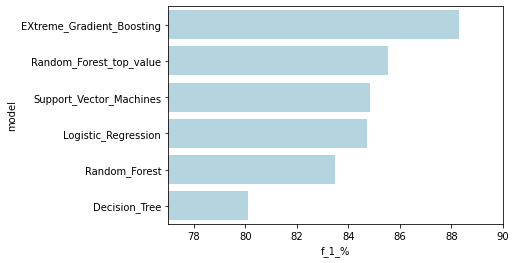

In [57]:
sns.barplot(x="f_1_%", y='model', data=model_score, color='lightblue')
plt.xticks(rotation=0)
plt.xlim(77, 90)
plt.show()

---
# <a id = 'task2-5'> 3. Кластеризация клиентов

---
Цель кластерного анализа – нахождение групп схожих объектов в выборке данных.  
Эти группы удобно называть кластерами.
    
---

In [58]:
# Выделяем независимые переменные

X = df[['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month']]

# Для начала приведем данные к единому масштабу, чтобы исключить влиение значений с большей числовой величиной

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.97970588,  0.42788074,  1.02686062, ..., -0.19332863,
        -1.91191971, -1.67847198],
       [-1.0207145 ,  0.42788074, -0.973842  , ...,  0.87368001,
         0.04517569,  0.1360137 ],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.46008079,
        -0.02049263, -0.02901851],
       ...,
       [ 0.97970588,  0.42788074,  1.02686062, ..., -0.46008079,
         0.93313947,  1.01103141],
       [-1.0207145 ,  0.42788074,  1.02686062, ..., -0.19332863,
        -0.25604937, -0.16225246],
       [ 0.97970588, -2.33709981,  1.02686062, ..., -0.72683295,
        -0.79947418, -0.69509885]])

---
## <a id = 'task3-1'> 3.1. Иерархическая кластеризация

---
Представляет собой алгоритм, который строит иерархию кластеров. Этот алгоритм начинает работу с того, что каждому экземпляру данных сопоставляется свой собственный кластер. Затем два ближайших кластера объединяются в один и так далее, пока не будет образован один общий кластер.  
    
Результат иерархической кластеризации может быть представлен с помощью дендрограммы  
    
---

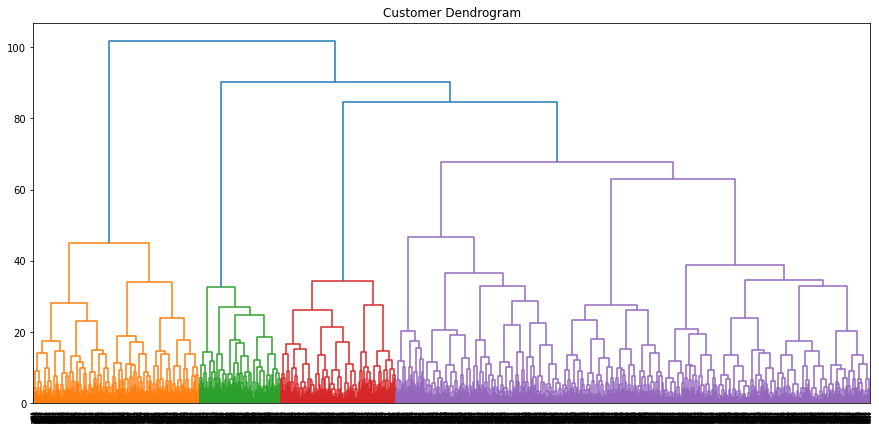

In [59]:
plt.figure(figsize=(15, 7))
plt.title("Customer Dendrogram")
# Используем “ward” в качестве метода определения расстояний, поскольку он минимизирует варианты расстояний между кластерами
dend = shc.dendrogram(shc.linkage(X_scaled, method='ward'))

---
Видим разделение на 4 кластера.  
Когда мы знаем количество кластеров для нашего набора данных, следующий шаг - сгруппировать точки данных в эти кластеры.  
Для этого будем использовать класс Agglomerative Clustering библиотеки sklearn.cluster

---

In [60]:
clusters = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clusters = clusters.fit_predict(X_scaled)
clusters

array([2, 1, 0, ..., 1, 0, 2], dtype=int64)

In [61]:
# Добавляем кластеры в таблицу с данными

df_clust_dendrogram = df.copy()
df_clust_dendrogram['Cluster'] = clusters
df_clust_dendrogram.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Cluster
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,2
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0,1
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0,0
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,1
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0,0


---
## <a id = 'task3-2'> 3.2. Медод K-средних | K-means

---
Разбивает множество элементов векторного пространства на заранее известное число кластеров k.  
    Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.
    
---

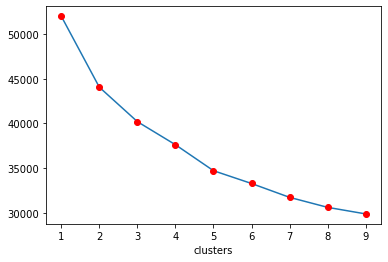

In [62]:
# строим график локтя (определяем оптимальное количесвто классов)

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k, init = 'k-means++')
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)
    
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.xlabel('clusters')

plt.show()

---
Отличия между классами плохо различимы визуально, поэтому будем руководствоваться разделением на классы методом иерархической кластеризации (4 класса)

---

Проверим количество классов с помощью

### Silhouette index


Силуэтный анализ относится к методу интерпретации и проверки согласованности в кластерах данных. Значение силуэта является мерой того, насколько объект похож на свой собственный кластер (сплоченность) по сравнению с другими кластерами (разделение). Он может быть использован для изучения расстояния между результирующими кластерами. График силуэта показывает меру того, насколько близко каждая точка в одном кластере находится к точкам в соседних кластерах, и, таким образом, предоставляет способ визуальной оценки таких параметров, как количество кластеров.   

- Если значение силуэта близко к 1, выборка хорошо кластеризована и уже назначена очень подходящему кластеру.  
- Если значение силуэта равно 0, выборка может быть назначена другому кластеру, ближайшему к нему, и выборка находится на одинаковом расстоянии от обоих кластеров. Это означает, что это указывает на перекрывающиеся кластеры   
- Если значение силуэта близко к -1, выборка ошибочно классифицируется и просто помещается где-то между кластерами.

---

In [63]:
no_of_clusters = range(2,10,1)

for n_clusters in no_of_clusters:
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(X_scaled)

    # Silhouette_score дает среднее значение для всех образцов

    silhouette_avg = silhouette_score(X_scaled, cluster_labels)

    print("For № of clusters =", n_clusters, " the average silhouette_score is:", silhouette_avg)

For № of clusters = 2  the average silhouette_score is: 0.16474446920681482
For № of clusters = 3  the average silhouette_score is: 0.1258991798389645
For № of clusters = 4  the average silhouette_score is: 0.13411441213717876
For № of clusters = 5  the average silhouette_score is: 0.14078763524197407
For № of clusters = 6  the average silhouette_score is: 0.12537315182124614
For № of clusters = 7  the average silhouette_score is: 0.13539393489162627
For № of clusters = 8  the average silhouette_score is: 0.11812769727709736
For № of clusters = 9  the average silhouette_score is: 0.1143649439478311


---
Видим, что silhouette_score наиболее высокий при разделении выборки на 2 кластера.   
Следующее по качеству значение соответствует 4 кластерам.  
Выбираем 4 кластера для вариативности срезов.

---

In [64]:
# Явно указываем количество кластеров

kmeans = KMeans(n_clusters=4, init = 'k-means++')

# fit_predict обучается на данных и каждому объекту присваивает кластер

clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 2, 1, ..., 2, 2, 2])

In [65]:
# Добавляем кластеры в таблицу с данными

df_clust_kmeans = df.copy()
df_clust_kmeans['Cluster'] = clusters
df_clust_kmeans.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,Cluster
0,1,1,1,1,0,6,1,29,14.227470,5,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,13,7,1.922936,1.910244,0,2
2,0,1,1,0,1,1,0,28,129.448479,2,2,1.859098,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,12,2,3.205633,3.357215,0,2
4,1,1,1,1,1,1,0,26,198.362265,2,3,1.113884,1.120078,0,1


---
## <a id = 'task3-3'> 3.3. Анализ срезов кластеров
    
---
Для анализа клиентской базы выберем кластеры, присвоенные клиентам с помощью метода k-means, как более продвинутого.
    
---

In [66]:
# Сгруппируем клиентов по кластерам с выводом средних значений параметров

# Сразу переименуем колонку Клстер в Параметр (при транспонировании она превратится в параметр)
df_clust_mean = df_clust_kmeans.rename(columns={'Cluster':'Parameter'}).copy()

# Считаем средние значения параметров в кластере
df_clust_mean = df_clust_mean.groupby('Parameter').mean()

# Добавляем колонку с количеством клиентов в кластере
df_clust_mean['clients_count'] = df_clust_kmeans.groupby('Cluster')['Cluster'].count()

# Переводим значения категориальных величин в %
df_clust_mean[['gender', 'Near_Location', 'Partner', 
               'Promo_friends', 'Phone', 'Group_visits', 'Churn']] = df_clust_mean[['gender', 'Near_Location', 'Partner', 
                                                                                       'Promo_friends', 'Phone', 'Group_visits', 'Churn']] *100
# Обозначим %-ные значения в названиях столбцов
df_clust_mean = df_clust_mean.rename(columns={'gender':'gender_%', 'Near_Location':'Near_Location_%', 'Partner':'Partner_%', 
                                              'Promo_friends':'Promo_friends_%', 'Phone':'Phone_%', 'Group_visits':'Group_visits_%', 
                                              'Churn':'Churn_%'})

df_clust_mean = df_clust_mean.sort_values(by='Churn_%', ascending = False).round(2)

df_clust_mean['clients_count'] = df_clust_mean['clients_count'].astype(int)

# Меняем порядок столбцов
df_clust_mean = df_clust_mean[['gender_%', 'Near_Location_%', 'Partner_%', 'Promo_friends_%',
                               'Phone_%', 'Contract_period', 'Group_visits_%', 'Age',
                               'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
                               'Avg_class_frequency_total', 'Avg_class_frequency_current_month','clients_count','Churn_%']]

df_clust_mean_T = df_clust_mean.T.rename(columns={2:1, 0:2, 3:3, 1:4})
df_clust_mean_T

Parameter,4,2,3,1
gender_%,48.01,49.46,55.66,51.54
Near_Location_%,100.00,0.00,98.13,95.55
Partner_%,35.94,46.20,35.20,77.68
Promo_friends_%,23.93,7.61,25.13,56.17
Phone_%,90.02,91.67,90.55,89.93
Contract_period,1.99,2.28,2.71,10.99
Group_visits_%,34.35,21.56,46.73,54.90
Age,28.17,28.50,30.10,29.99
Avg_additional_charges_total,130.73,134.40,159.55,162.55
Month_to_end_contract,2.76,3.00,3.29,10.35


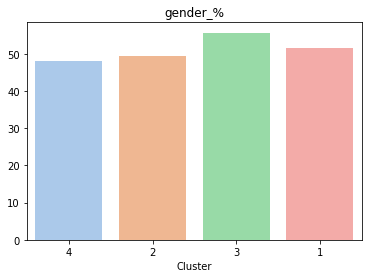

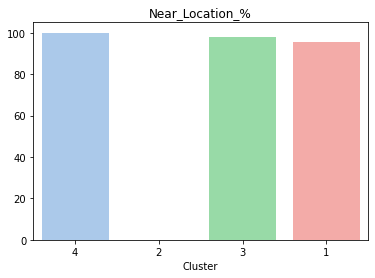

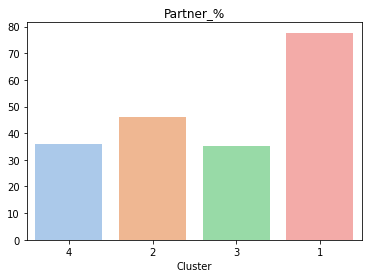

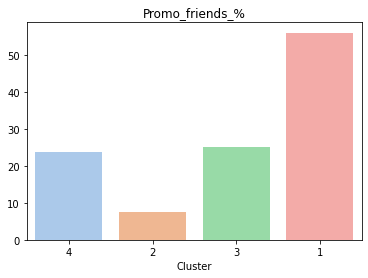

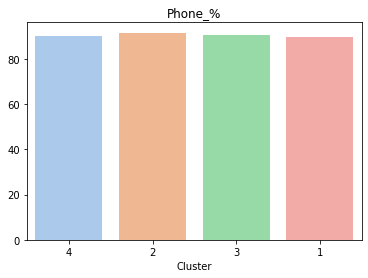

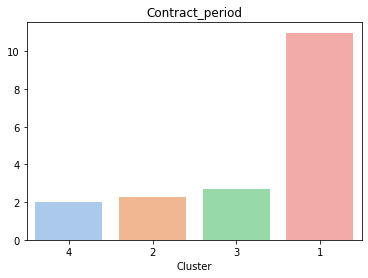

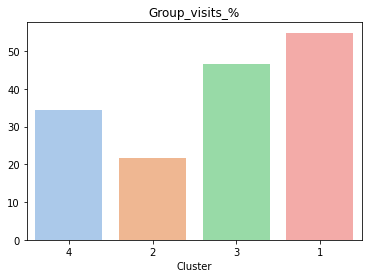

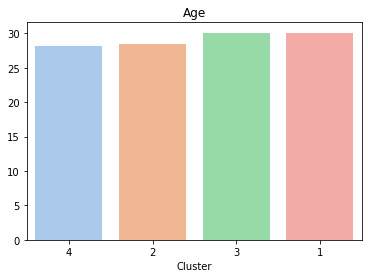

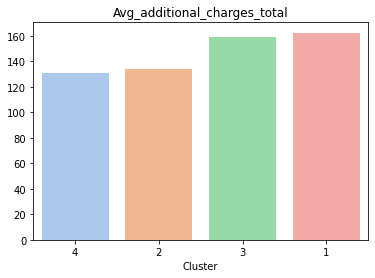

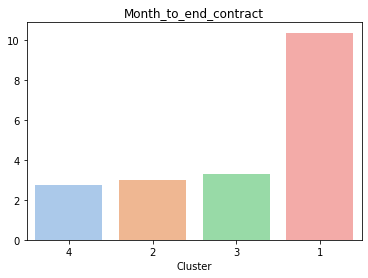

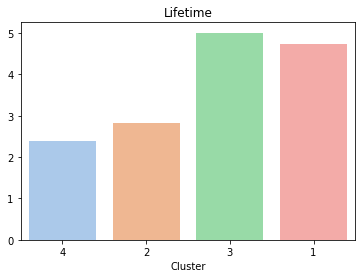

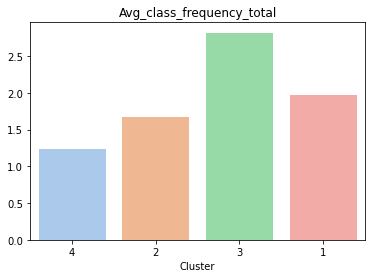

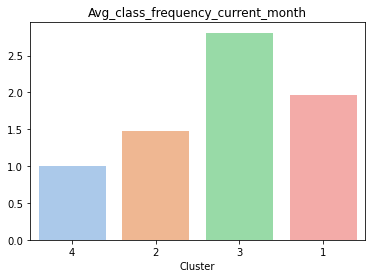

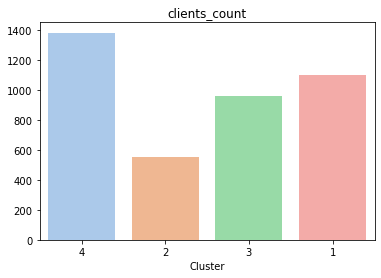

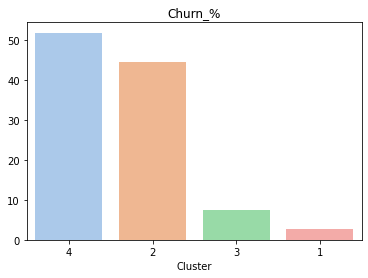

In [67]:
for a in range(len(df_clust_mean_T)):
    sns.barplot(data = df_clust_mean_T[a:a+1], palette='pastel')
    plt.title(df_clust_mean_T[a:a+1].index[0])
    plt.xlabel('Cluster')
    plt.show()
    print('')

---
## <a id = 'task3-4'> 3.4. Выводы и предложения
    
---

In [68]:
# Определяем % клиентов в каждом кластере

Claster_1 = int(df_clust_mean_T.T['clients_count'][0:1] / df_clust_mean_T.T['clients_count'].sum()*100)
Claster_2 = int(df_clust_mean_T.T['clients_count'][1:2] / df_clust_mean_T.T['clients_count'].sum()*100)
Claster_3 = int(df_clust_mean_T.T['clients_count'][2:3] / df_clust_mean_T.T['clients_count'].sum()*100)
Claster_4 = int(df_clust_mean_T.T['clients_count'][3:4] / df_clust_mean_T.T['clients_count'].sum()*100)

print(f'Клиентов в 1 кластере: {Claster_1}%')
print(f'Клиентов в 2 кластере: {Claster_2}%')
print(f'Клиентов в 3 кластере: {Claster_3}%')
print(f'Клиентов в 4 кластере: {Claster_4}%')

Клиентов в 1 кластере: 34%
Клиентов в 2 кластере: 13%
Клиентов в 3 кластере: 24%
Клиентов в 4 кластере: 27%


---
#### Cluster 1  
Самый крупный кластер (36%).   
Этот кластер также является самым проблемным. Больше половины клиентов этой групы попадают в отток.  

Отличительные характеристики клиентов кластера:  
- редко посещают групповые занятия
- редко посещают клуб
- редко пользуются платными услугами

Делаем вывод, что эти характеристики являются самыми важными для удержания клиентов.

#### Cluster 2  
Этот кластер самый малочисленный (9%) и отток в нем вдвое меньше.
Не смотря на все еще высокий % оттока, кластер имеет все признаки благополучного.

Отличительные характеристики клиентов кластера:  
- отсутствие контактов в базе
- меньше пользуются платными услугами

Эти характеристики могут быть связаны.  
Если клуб пользуется контактной информацией клиента для предложения услуг, то эти клиенты выпадают из этой программы.  
Вполне возможно, что связь с клиентом могла бы перевести его в благополучный кластер.

#### Cluster 3
Благополучный кластер.  
Не смотря на не самый низкий % оттока, кластер имеет все признаки самого благополучного.

Отличительные характеристики клиентов кластера:  
- чаще посещают клуб
- чаще пользуются платными услугами

Статистически, видим отличия в сроке действия абоненемента, который близок к сроку в худшем кластере, но судя по значению lifetime, это просто особенность кластера, которая не влияет на отток.

Единственный параметр, который не позволяет этого достичь - менее частое посещение групповых занятий, по сравнению с лючшим по оттоку кластером.

#### Cluster 4
Лучший кластер.  
Самые лояльные клиенты.  
Клиенты этого кластера в полной мере пользуются услугами клуба.

Отличительные характеристики клиентов кластера:  
- пришли по программе привлечения клиентов

Убеждаемся, что программа направлена на целевую аудиторию клуба.

---
Исходя из срезов кластеров, структурируем параметры по степени влияния на отток:

#### 1. Выделяем параметры с наиболее сильным влиянием на отток:  

- Avg_class_frequency_current_month  
- Promo_friends  
- Group_visits  
- Partner  
- Avg_additional_charges_total  

#### 2. Параметры с низким влиянием на отток:  

- Near_Location  
- Phone  

#### 3. Параметры, практически не влияющие на отток:  

- gender  
- Age  

#### 4. Параметры, которые можно считать скорее следствием лояльности клиентов:

- Lifetime  
- Contract_period  
- Month_to_end_contract  